# Определение перспективного тарифа для телеком компании

Изучим данные, которые переданы для работы над анализом.

## Импортируем библиотеку pandas и numpy

In [1]:
import pandas as pd
import numpy as np

Прочитаем файлы и сохраним их в переменных. 

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Выведим первые 25 строчек таблицы *df_calls*, чтобы ознакомиться с информацией.

In [3]:
df_calls.head(25)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Выведим первые 25 строчек таблицы *df_internet*, чтобы ознакомиться с информацией.

In [5]:
df_internet.head(25)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Выведим первые 5 строчек таблицы *df_messages*, чтобы ознакомиться с информацией.

In [7]:
df_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Выведим данные таблицы *df_tariffs*, чтобы ознакомиться с информацией.

In [9]:
df_tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Выведим данные таблицы *df_users*, чтобы ознакомиться с информацией.

In [11]:
df_users.head(25)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

# Переработка df_calls

В столбце *duration* было обнаружено большое количество значений *0.0*, так как тарификация поминутная, то заменим значения на *1*.

In [13]:
df_calls['duration'] = df_calls['duration'].replace(0, 1)

Выведим и посмотрим после замены на первые 10 строчек таблицы.

In [14]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.00,1000
1,1000_1,2018-08-17,1.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,1.00,1000
6,1000_6,2018-10-18,1.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,1.00,1000


Переведём тип данных столбца *call_date* в *datetime*.

In [15]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')

Добавим новые столбцы, чтобы разделить день/месяц/год.

In [16]:
df_calls['day_weekday'] = df_calls['call_date'].dt.weekday
df_calls['day_month'] = df_calls['call_date'].dt.month
df_calls['day_year'] = df_calls['call_date'].dt.year

Выведим тип и столбец с данными времени.

In [17]:
df_calls.head()

,id,call_date,duration,user_id,day_weekday,day_month,day_year
0,1000_0,2018-07-25,1.00,1000,2,7,2018
1,1000_1,2018-08-17,1.00,1000,4,8,2018
2,1000_2,2018-06-11,2.85,1000,0,6,2018
3,1000_3,2018-09-21,13.80,1000,4,9,2018
4,1000_4,2018-12-15,5.18,1000,5,12,2018


# Переработка df_users

Мы обнаружили, что данные *churn_date*, *reg_date* не верного типа.

In [18]:
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
383,1383,41,NaN,Ульяновск,Юна,Сомова,2018-10-24,smart
157,1157,27,NaN,Москва,Виктория,Белоусова,2018-02-23,smart
212,1212,21,NaN,Саранск,Руслан,Пономарев,2018-11-09,smart
427,1427,24,NaN,Казань,Ириней,Азаров,2018-04-03,smart
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart


Переведём данные столбцы в тип *datetime*.

In [19]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%dT%H:%M:%S')


В столбце много значений *Nan*, заменим их на текущее время.

In [20]:
import datetime
df_users['churn_date'] = df_users['churn_date'].fillna(value = datetime.datetime.now())

Переименуем столбец *tariff_name*, чтобы различать его и не перепутать с самой таблицей.

In [21]:
df_users.set_axis(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name'], axis = 'columns', inplace = True)


Просмотрим результат форматирования таблицы.

In [22]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,2019-09-07 19:45:18.683269,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2019-09-07 19:45:18.683269,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2019-09-07 19:45:18.683269,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2019-09-07 19:45:18.683269,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2019-09-07 19:45:18.683269,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


# Переработка df_messages

Видим, что данные *message_date* так же не верного типа.

In [23]:
df_messages.head(2)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


Переведём данные столбца в тип *datetime*.

In [24]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')


Добавим столбцы с отправленными сообщениями на день/месяц/год.

In [25]:
df_messages['day_weekday'] = df_messages['message_date'].dt.weekday
df_messages['day_month'] = df_messages['message_date'].dt.month
df_messages['day_year'] = df_messages['message_date'].dt.year

----------

<font color=blue>
Опять же, нас интересует только месяц, можно не делать лишних столбцов.
</font>


---------

# Переработка df_internet

Видим, что данные *session_date* так же не верного типа.

In [26]:
df_internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


Переведём данные столбца в тип *datetime*.

In [27]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')


Добавим столбцы с отправленными сообщениями на день/месяц/год.

In [28]:
df_internet['day_weekday'] = df_internet['session_date'].dt.weekday
df_internet['day_month'] = df_internet['session_date'].dt.month
df_internet['day_year'] = df_internet['session_date'].dt.year

Объединим столбец *df_tariffs* и *df_users*.

In [29]:
table_user_tar = df_tariffs
for df in [df_users]:
    table_user_tar = table_user_tar.merge(df, on = ['tariff_name'], how = 'left')


In [30]:
table_user_tar

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date
0,50,15360,500,550,200,3,3,smart,1001,41,2019-09-07 19:45:18.683269,Москва,Иван,Ежов,2018-11-01
1,50,15360,500,550,200,3,3,smart,1002,59,2019-09-07 19:45:18.683269,Стерлитамак,Евгений,Абрамович,2018-06-17
2,50,15360,500,550,200,3,3,smart,1005,67,2019-09-07 19:45:18.683269,Набережные Челны,Афанасий,Горлов,2018-01-25
3,50,15360,500,550,200,3,3,smart,1006,21,2019-09-07 19:45:18.683269,Ульяновск,Леонид,Ермолаев,2018-02-26
4,50,15360,500,550,200,3,3,smart,1007,65,2019-09-07 19:45:18.683269,Москва,Юна,Березина,2018-04-19
5,50,15360,500,550,200,3,3,smart,1008,63,2019-09-07 19:45:18.683269,Челябинск,Рустэм,Пономарёв,2018-12-19
6,50,15360,500,550,200,3,3,smart,1009,24,2019-09-07 19:45:18.683269,Пермь,Василиса,Блинова,2018-03-22
7,50,15360,500,550,200,3,3,smart,1010,26,2019-09-07 19:45:18.683269,Тюмень,Эдуард,Кононов,2018-08-05
8,50,15360,500,550,200,3,3,smart,1011,44,2019-09-07 19:45:18.683269,Самара,Веселина,Алёшко,2018-03-19
9,50,15360,500,550,200,3,3,smart,1012,38,2019-09-07 19:45:18.683269,Санкт-Петербург,Варлам,Соловьев,2018-03-28


Выведим таблицу после объединения.

In [31]:
table_user_tar.sample(5)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date
44,50,15360,500,550,200,3,3,smart,1061,41,2019-09-07 19:45:18.683269,Санкт-Петербург,Тамара,Ситникова,2018-07-15
306,50,15360,500,550,200,3,3,smart,1435,32,2019-09-07 19:45:18.683269,Москва,Евфросинья,Азимова,2018-02-17
70,50,15360,500,550,200,3,3,smart,1100,58,2019-09-07 19:45:18.683269,Санкт-Петербург,Руслан,Красильников,2018-07-02
359,1000,30720,3000,1950,150,1,1,ultra,1024,73,2019-09-07 19:45:18.683269,Санкт-Петербург,Иулиан,Антипов,2018-10-31
196,50,15360,500,550,200,3,3,smart,1266,32,2019-09-07 19:45:18.683269,Калуга,Тала,Антропова,2018-07-20


Сохраним в переменных отдельно пользователей двух тарифных планов.

In [32]:
table_user_tar_smart = table_user_tar.query('tariff_name == "smart"')
table_user_tar_ultra = table_user_tar.query('tariff_name == "ultra"')

Выведим кол-ство пользователей каждого тарифного плана.

In [33]:
print('Количество пользователей тарифа Smart:', len(table_user_tar_smart))
print('Количество пользователей тарифа Ultra:', len(table_user_tar_ultra))

Количество пользователей тарифа Smart: 351
Количество пользователей тарифа Ultra: 149


Объеденим таблицу *table_user_tar* из *df_calls*.

In [34]:
user_call = table_user_tar
for df in [df_calls]:
    user_call = user_call.merge(df, on = ['user_id'], how = 'left')

Выведим таблицу после соединения.

In [35]:
pd.set_option('display.max_columns', None)

user_call.sample(5)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration,day_weekday,day_month,day_year
104214,50,15360,500,550,200,3,3,smart,1408,53,2019-09-07 19:45:18.683269,Самара,Касьян,Кукушкин,2018-05-27,1408_88,2018-09-13,20.30,3.0,9.0,2018.0
44285,50,15360,500,550,200,3,3,smart,1164,49,2019-09-07 19:45:18.683269,Магнитогорск,Геральд,Лебедев,2018-04-03,1164_267,2018-08-02,8.29,3.0,8.0,2018.0
102790,50,15360,500,550,200,3,3,smart,1400,71,2019-09-07 19:45:18.683269,Москва,Ренат,Артёмов,2018-08-24,1400_84,2018-10-17,11.26,2.0,10.0,2018.0
66795,50,15360,500,550,200,3,3,smart,1247,19,2019-09-07 19:45:18.683269,Москва,Адам,Тарасов,2018-05-23,1247_284,2018-12-31,18.07,0.0,12.0,2018.0
174845,1000,30720,3000,1950,150,1,1,ultra,1348,55,2019-09-07 19:45:18.683269,Москва,Вероника,Громова,2018-10-07,1348_115,2018-10-17,4.28,2.0,10.0,2018.0


Сохраним сводную таблицу пользователей с кол-ством звонков и суммой минут помесячно.

In [36]:
user_call_sum = user_call.pivot_table(index = ['user_id', 'day_month'], values='duration', aggfunc=['count', 'sum'])


Выведим 10 строчек из общей таблицы.

In [37]:
user_call_sum.sample(10)

,,count,sum
,,duration,duration
user_id,day_month,,
1308,2.0,31,252.77
1472,3.0,79,565.30
1335,7.0,77,578.21
1155,11.0,69,536.63
1219,4.0,73,503.82
1490,5.0,56,338.17
1339,8.0,45,292.83
1021,12.0,155,932.62


In [ ]:
calls_per_month = calls_df.groupby(['user_id', 'date']).agg({'duration': ['count', 'sum']})
calls_per_month.columns = ['calls', 'minutes']
calls_per_month.head()

Объеденим таблицу *user_call_sum* из *user_call*.

In [38]:
table_user_call = user_call_sum
for df in [user_call]:
    table_user_call = table_user_call.merge(df, on = ['user_id', 'day_month'], how = 'left')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Выведим 10 строчек из таблицы.

In [39]:
table_user_call.sample(10)

,user_id,day_month,"(count, duration)","(sum, duration)",messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration,day_weekday,day_year
188083,1464,10.0,87,619.68,50,15360,500,550,200,3,3,smart,44,2019-09-07 19:45:18.683269,Саранск,Антонина,Авросинова,2018-02-17,1464_488,2018-10-23,5.31,1.0,2018.0
71834,1179,6.0,70,420.32,50,15360,500,550,200,3,3,smart,43,2019-09-07 19:45:18.683269,Вологда,Дана,Астапенко,2018-04-19,1179_110,2018-06-19,1.66,1.0,2018.0
162492,1400,12.0,79,593.07,50,15360,500,550,200,3,3,smart,71,2019-09-07 19:45:18.683269,Москва,Ренат,Артёмов,2018-08-24,1400_35,2018-12-12,1.00,2.0,2018.0
150751,1377,12.0,185,1217.83,1000,30720,3000,1950,150,1,1,ultra,59,2019-09-07 19:45:18.683269,Брянск,Альфред,Семин,2018-02-25,1377_207,2018-12-16,4.23,6.0,2018.0
47267,1118,9.0,104,738.60,50,15360,500,550,200,3,3,smart,65,2019-09-07 19:45:18.683269,Казань,Вера,Латышева,2018-03-06,1118_160,2018-09-12,6.51,2.0,2018.0
111942,1288,10.0,65,491.25,50,15360,500,550,200,3,3,smart,63,2019-09-07 19:45:18.683269,Улан-Удэ,Григорий,Давыдов,2018-09-09,1288_169,2018-10-02,1.00,1.0,2018.0
89681,1224,12.0,104,684.88,50,15360,500,550,200,3,3,smart,58,2019-09-07 19:45:18.683269,Магнитогорск,Ахмет,Тарасов,2018-04-24,1224_237,2018-12-01,6.51,5.0,2018.0
141639,1360,4.0,117,779.50,1000,30720,3000,1950,150,1,1,ultra,46,2019-09-07 19:45:18.683269,Санкт-Петербург,Лаура,Макарова,2018-03-18,1360_180,2018-04-22,12.36,6.0,2018.0
99565,1253,12.0,41,231.49,1000,30720,3000,1950,150,1,1,ultra,29,2019-09-07 19:45:18.683269,Астрахань,Алла,Масленникова,2018-08-06,1253_162,2018-12-28,6.76,4.0,2018.0
180910,1453,1.0,128,846.50,1000,30720,3000,1950,150,1,1,ultra,50,2019-09-07 19:45:18.683269,Москва,Кузьма,Акуленко,2018-01-01,1453_1214,2018-01-18,14.45,3.0,2018.0


Сохраним сводную таблицу *pivot_call* с данными о тарифах и статистике звонков.

In [40]:
pivot_call = table_user_call.pivot_table(index = ['user_id', 'age', 'city', 'day_month', 'tariff_name', 'rub_monthly_fee', 'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'mg_per_month_included'], values = ['duration'], aggfunc=['count', 'sum'])



Выведим таблицу.

In [41]:
pivot_call

count  \
                                                                                                                                                                 duration   
user_id age city        day_month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mg_per_month_included            
1000    52  Краснодар   5.0       ultra       1950            3000             1000              1               150        1              30720                       22   
                        6.0       ultra       1950            3000             1000              1               150        1              30720                       43   
                        7.0       ultra       1950            3000             1000              1               150        1              30720                       47   
                        8.0       ultra       1950            3000             1000              1               150        1              30720                       52   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                       58   
                        10.0      ultra       1950            3000             1000              1               150        1              30720                       57   
                        11.0      ultra       1950            3000             1000              1               150        1              30720                       43   
                        12.0      ultra       1950            3000             1000              1               150        1              30720                       46   
1001    41  Москва      11.0      smart       550             500              50                3               200        3              15360                       59   
                        12.0      smart       550             500              50                3               200        3              15360                       63   
1002    59  Стерлитамак 6.0       smart       550             500              50                3               200        3              15360                       15   
                        7.0       smart       550             500              50                3               200        3              15360                       26   
                        8.0       smart       550             500              50                3               200        3              15360                       42   
                        9.0       smart       550             500              50                3               200        3              15360                       36   
                        10.0      smart       550             500              50                3               200        3              15360                       33   
                        11.0      smart       550             500              50                3               200        3              15360                       32   
                        12.0      smart       550             500              50                3               200        3              15360                       33   
1003    23  Москва      8.0       ultra       1950            3000             1000              1               150        1              30720                       55   
                        9.0       ultra       1950            3000             1000              1               150        1              30720                      134   
                        10.0      ultra       1950            3000             1000              1               150        1              30720                      108   
                        11.0      ultra       1950            3000             1000              1               150        1              30720                      115   
            

Объеденим таблицу *table_user_tar* из *df_messages*.

In [42]:
user_messages = table_user_tar
for df in [df_messages]:
    user_messages = user_messages.merge(df, on = ['user_id'], how = 'left')

Сохраним сводную таблицу *user_messages_sum* с данными о тарифах и статистике сообщений.

In [43]:
user_messages_sum = user_messages.pivot_table(index = ['user_id', 'day_month'], values='id', aggfunc=['count'])

Выведим 10 значений созданной таблицы.

In [44]:
user_messages_sum.sample(10)

,,count
,,id
user_id,day_month,
1350,11.0,60
1050,8.0,52
1146,8.0,93
1199,10.0,72
1262,8.0,30
1410,8.0,5
1330,7.0,76
1281,12.0,66


Соединим таблицы *pivot_call* и *user_messages_sum*, сохраним в одной таблице *merge*.

In [45]:
merge = pivot_call.join(user_messages_sum)

Посмотрим на таблицу.

In [46]:
merge

count  \
                                                                                                                                                                 duration   
user_id day_month age rub_per_gb tariff_name rub_monthly_fee mg_per_month_included minutes_included rub_per_minute rub_per_message city        messages_included            
1000    5.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    22   
        6.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    43   
        7.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    47   
        8.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    52   
        9.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    58   
        10.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    57   
        11.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    43   
        12.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                    46   
1001    11.0      41  200        smart       550             15360                 500              3              3               Москва      50                      59   
        12.0      41  200        smart       550             15360                 500              3              3               Москва      50                      63   
1002    6.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      15   
        7.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      26   
        8.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      42   
        9.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      36   
        10.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      33   
        11.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      32   
        12.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                      33   
1003    8.0       23  150        ultra       1950            30720                 3000             1              1               Москва      1000                    55   
        9.0       23  150        ultra       1950            30720                 3000             1              1               Москва      1000                   134   
        10.0      23  150        ultra       1950            30720                 3000             1              1               Москва      1000                   108   
        11.0      23  150        ultra       1950            30720                 3000             1              1               Москва      1000                   115   
        12.0

Объеденим таблицу *table_user_tar* из *df_internet*.

In [47]:
mb_used = table_user_tar
for df in [df_internet]:
    mb_used = mb_used.merge(df, on = ['user_id'], how = 'left')

Сохраним сводную таблицу *mb_used* с данными о тарифах и статистике затрат интернета.

In [48]:
mb_used_sum = mb_used.pivot_table(index = ['user_id', 'day_month'], values='mb_used', aggfunc=['sum'])


Выведим 10 значений созданной таблицы.

In [49]:
mb_used_sum.sample(10)

,,sum
,,mb_used
user_id,day_month,
1454,9.0,10541.18
1045,8.0,23026.27
1274,11.0,18234.22
1414,9.0,19406.45
1482,7.0,16367.59
1101,5.0,3275.61
1242,11.0,4926.11
1064,5.0,25111.44


Соединим таблицы *merge* и *mb_used_sum*, сохраним в одной таблице *full_table*.

In [50]:
full_table = merge.join(mb_used_sum)

Переименуем новые созднанные столбцы со статистикой.

In [51]:
full_table.columns = ['duration_count', 'duration_count_sum', 'messages', 'mb_used']

Посморим на таблицу.

In [52]:
full_table

duration_count  \
user_id day_month age rub_per_gb tariff_name rub_monthly_fee mg_per_month_included minutes_included rub_per_minute rub_per_message city        messages_included                   
1000    5.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           22   
        6.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           43   
        7.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           47   
        8.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           52   
        9.0       52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           58   
        10.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           57   
        11.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           43   
        12.0      52  150        ultra       1950            30720                 3000             1              1               Краснодар   1000                           46   
1001    11.0      41  200        smart       550             15360                 500              3              3               Москва      50                             59   
        12.0      41  200        smart       550             15360                 500              3              3               Москва      50                             63   
1002    6.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             15   
        7.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             26   
        8.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             42   
        9.0       59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             36   
        10.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             33   
        11.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             32   
        12.0      59  200        smart       550             15360                 500              3              3               Стерлитамак 50                             33   
1003    8.0       23  150        ultra       1950            30720                 3000             1              1               Москва      1000                           55   
        9.0       23  150        ultra       1950            30720                 3000             1              1               Москва      1000                          134   
        10.0      23  150        ultra       1950            30720                 3000             1              1               Москва      1000                          108   
        11.0      23  150        ultra       1950            30720                 3000             1              1               Москва      1000                          115   
        12.0      23  

Посмотрим на пропущенные значения в данных.

In [53]:
full_table.isnull().sum()

duration_count          0
duration_count_sum      0
messages              496
mb_used                11
dtype: int64

Видим, что есть достаточно много пропущенных данных в *messages* и несколько в *mb_used*, что может значит то, что возможно некоторые пользователи не отправляли сообщения или не пользовались ннтернетом в некоторые промежутки времени.

Заменим данные значения на *0* для удобства подсчётов.

In [54]:
full_table['messages'] = full_table['messages'].fillna(0)
full_table['mb_used'] = full_table['mb_used'].fillna(0)


Переобразуем таблицу для выполнения подсчётов.

In [55]:
full_table.reset_index(inplace=True)

Пересчитаем по формуле ((бесплатны лимит - потраченный) * цену единицы) и добавим столбцы с прибылью сверх тарифа по звонкам, сообщениям и интернету. 

In [56]:
full_table['calls_revenue'] = ((full_table['duration_count_sum'] - full_table['minutes_included']) * full_table['rub_per_minute'])
full_table['messages_revenue'] = ((full_table['messages'] - full_table['messages_included']) * full_table['rub_per_message'])
full_table['mg_revenue'] = ((full_table['mb_used'] - full_table['mg_per_month_included']) * full_table['rub_per_gb']/1024)


Посмотрим на результаты.

In [57]:
full_table.sample(5)

,user_id,day_month,age,rub_per_gb,tariff_name,rub_monthly_fee,mg_per_month_included,minutes_included,rub_per_minute,rub_per_message,city,messages_included,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue
406,1064,8.0,55,200,smart,550,15360,500,3,3,Якутск,50,68,391.55,31.0,24081.39,-325.35,-57.0,1703.396484
2843,1449,8.0,55,200,smart,550,15360,500,3,3,Москва,50,77,528.82,91.0,15940.62,86.46,123.0,113.402344
842,1135,3.0,64,200,smart,550,15360,500,3,3,Архангельск,50,62,437.35,15.0,14804.59,-187.95,-105.0,-108.478516
1449,1228,12.0,28,200,smart,550,15360,500,3,3,Нижний Новгород,50,58,467.65,0.0,19171.76,-97.05,-150.0,744.484375
1765,1282,11.0,59,200,smart,550,15360,500,3,3,Ульяновск,50,97,733.11,63.0,13156.80,699.33,39.0,-430.312500


Для верного подсчёта прибыли сверх тарифа, заменим отрицательные значения на *0*.

In [58]:
full_table['messages_revenue'] = full_table['messages_revenue'].clip(lower = 0)
full_table['calls_revenue'] = full_table['calls_revenue'].clip(lower = 0)
full_table['mg_revenue'] = full_table['mg_revenue'].clip(lower = 0)

Переведём нужные столбцы в тип *int*.

In [59]:
full_table['calls_revenue'] = full_table['calls_revenue'].astype('int')
full_table['messages_revenue'] = full_table['messages_revenue'].astype('int')
full_table['messages'] = full_table['messages'].astype('int')
full_table['mg_revenue'] = full_table['mg_revenue'].astype('int')
full_table['day_month'] = full_table['day_month'].astype('int')

Проверим результат.

In [60]:
full_table.sample(10)

,user_id,day_month,age,rub_per_gb,tariff_name,rub_monthly_fee,mg_per_month_included,minutes_included,rub_per_minute,rub_per_message,city,messages_included,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue
2267,1363,7,69,150,ultra,1950,30720,3000,1,1,Нижний Тагил,1000,133,949.36,0,19036.39,0,0,0
270,1044,8,51,200,smart,550,15360,500,3,3,Рязань,50,52,375.30,5,20141.98,0,0,933
821,1132,9,24,200,smart,550,15360,500,3,3,Москва,50,90,653.62,0,15697.68,460,0,65
564,1089,10,19,150,ultra,1950,30720,3000,1,1,Иркутск,1000,66,502.46,128,20861.14,0,0,0
50,1006,10,21,200,smart,550,15360,500,3,3,Ульяновск,50,44,258.93,0,19696.60,0,0,846
1855,1296,7,60,200,smart,550,15360,500,3,3,Москва,50,41,333.41,46,15613.75,0,0,49
967,1155,5,71,200,smart,550,15360,500,3,3,Ставрополь,50,52,349.94,42,12150.64,0,0,0
599,1096,10,60,150,ultra,1950,30720,3000,1,1,Брянск,1000,41,301.53,98,13979.53,0,0,0
2841,1448,12,42,200,smart,550,15360,500,3,3,Кострома,50,50,454.46,40,19645.67,0,0,837
657,1104,11,60,150,ultra,1950,30720,3000,1,1,Нижний Тагил,1000,51,410.00,74,19594.44,0,0,0


Добавим новый столбец *revenue*, где подсуммируем прибыль с учетом стоимости тарифа и сверх тарифа.

In [61]:
full_table['revenue'] = full_table['rub_monthly_fee'] + full_table['calls_revenue'] + full_table['messages_revenue'] + full_table['mg_revenue']


Посмотрим на таблицу.

In [62]:
full_table.sample(5)

,user_id,day_month,age,rub_per_gb,tariff_name,rub_monthly_fee,mg_per_month_included,minutes_included,rub_per_minute,rub_per_message,city,messages_included,duration_count,duration_count_sum,messages,mb_used,calls_revenue,messages_revenue,mg_revenue,revenue
484,1077,10,18,200,smart,550,15360,500,3,3,Москва,50,31,197.82,13,2237.24,0,0,0,550
2418,1383,12,41,200,smart,550,15360,500,3,3,Ульяновск,50,41,275.80,9,10032.34,0,0,0,550
976,1156,12,63,150,ultra,1950,30720,3000,1,1,Набережные Челны,1000,27,181.73,6,11873.28,0,0,0,1950
1789,1285,10,44,200,smart,550,15360,500,3,3,Краснодар,50,49,369.42,86,8483.07,0,108,0,658
2525,1396,12,23,150,ultra,1950,30720,3000,1,1,Пенза,1000,75,533.35,74,7289.94,0,0,0,1950


Сохраним в переменной *total_revenue* общую прибыль с каждого тарифа отдельно по звонкам/сообщениям/интернету и общую стоимость.

In [63]:
total_revenue = full_table.pivot_table(index = ['tariff_name'], values = ['calls_revenue', 'messages_revenue', 'mg_revenue', 'revenue'], aggfunc=['sum'])


Выведим таблицу.

In [64]:
total_revenue

sum                                     
            calls_revenue messages_revenue mg_revenue  revenue
tariff_name                                                   
smart              237385            38784    1197088  2695907
ultra                   0                0     105323  1959773

* Больше всего приносит дополнительного дохода тариф Smart.
* Самым прибильным сегментом является - интернет, при том в двух тарифах.
* Общая прибыль больше всего у тарифа Smart.

Сохраним в переменную *sum_smart* таблицу пользователей с тарифом Smart.

In [65]:
sum_smart = full_table[(full_table['tariff_name'] == 'smart')]

Сохраним в переменную *sum_ultra* таблицу пользователей с тарифом Ultra.

In [66]:
sum_ultra = full_table[(full_table['tariff_name'] == 'ultra')]

## Выведим гистограммы со статистикой пользователей *Smart*.

* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Построим гистограмму с кол-ством минут для тарифа.

In [67]:
sum_smart['duration_count_sum'].hist(bins=35, range = (0, 2000))

* Видим, что пик затрат минут как раз приходится на лимит тарифа: 250 - 500 минут, но довольно много пользователей тратят больше лимита, доходя до 600 - 750 минут, встречаются и около 1000.

Построим гистограмму с кол-ством сообщений для тарифа.

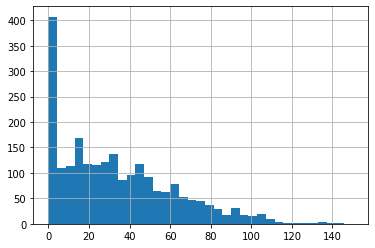

In [68]:
sum_smart['messages'].hist(bins=35, range = (0, 150))

* Видим, что очень много пользователей не отправляют сообщения, либо отправляют не более 5-ти.
* Несмотря на лимит в 50 сообщений, не мало пользователей превышают его и довольно много встречаются отправки 50-80 сообщений, есть выше 100 сообщений.

Построим гистограмму с кол-ством мегабайт для тарифа.

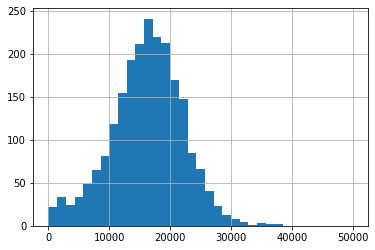

In [69]:
sum_smart['mb_used'].hist(bins=35, range = (0, 50000))

* Видим, что небольшая часть пользователей не пользуются интернетом, либо же используют не больше 5 гб.
* Пик припадает на уровне 15 гб, но много пользователей превышают данный лимит и хвост доходит к 0 только ближе к 30 гб.

## Выведим гистограммы со статистикой пользователей *Ultra*.


* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Построим гистограмму с кол-ством минут для тарифа.

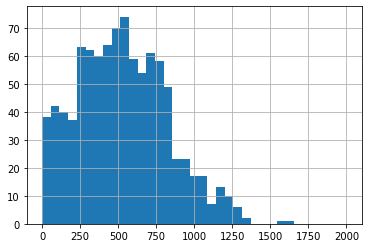

In [70]:
sum_ultra['duration_count_sum'].hist(bins=35, range = (0, 2000))

* Видим, что небольшая часть пользователей не пользуются сотовой связью, либо же используют не больше 250 минут.
* Пик кол-ства минут находится около 500-600 минут и держится до 800 минут, далее резкий спад, хвост приближается к 0 после 1300 минут.

Построим гистограмму с кол-ством сообщений для тарифа.

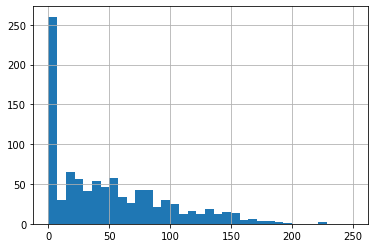

In [71]:
sum_ultra['messages'].hist(bins=35, range = (0, 250))

* Видим, что очень много пользователей не отпрааляю сообщения, либо же отправляют не больше 5.
* Те, кто пользуется отправкой сообщений отправляет около 20-100 сообщений, хвост приближается к 0 после 150 сообщений.

Построим гистограмму с кол-ством мегабайт для тарифа.

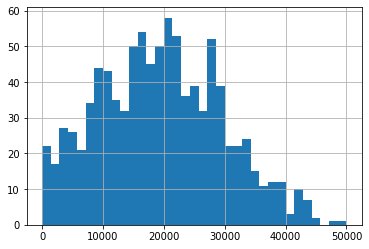

In [72]:
sum_ultra['mb_used'].hist(bins=35, range = (0, 50000))

* Видим, что небольшая часть пользователей не использует интернет.
* Пик мегабайт приходит на 20-23 гб, так же виден скачёк ближе к 30 гб, хвост приближается к 0 после 45 гб.

Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу.

In [73]:
variance = full_table.pivot_table(index = ['tariff_name'], values = ['duration_count_sum', 'messages', 'mb_used'], aggfunc=['mean', 'var', 'std'])


Выведим таблицу.

In [74]:
variance

mean                                         var  \
            duration_count_sum       mb_used   messages duration_count_sum   
tariff_name                                                                  
smart               407.038614  16209.366329  33.396311       33690.653945   
ultra               529.501788  19462.456225  49.033649       88590.969532   

                                                      std                \
                  mb_used     messages duration_count_sum       mb_used   
tariff_name                                                               
smart        3.453040e+07   798.595792         183.550140   5876.257150   
ultra        1.025525e+08  2198.733603         297.642352  10126.820419   

                        
              messages  
tariff_name             
smart        28.259437  
ultra        46.890656

## Общие выводы по распределениям

* Пользователи тарифа Smart часто не вклиниваются в лимиты, чаще всего по кол-ству минут и очень много по лимиту мегабайт.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифак довольно много либо не пользуются отправкой сообщений, либо же используют в небольших кол-ствах до 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.

## Проверка гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Начнём с формулировки нулевой гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства. 
H₀ -  среднее рассматриваемой генеральной совокупности равно второй. Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ - среднее генеральной совокупности не равно второй.

Критический уровень статистической значимости присвоим значением 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод *scipy.stats.ttest_ind*.

In [75]:
from scipy import stats as st

smart = sum_smart['revenue']
ultra = sum_ultra['revenue']

print('cреднее Smart: ',pd.Series(smart).mean())
print('cреднее Ultra: ',pd.Series(ultra).mean())
alpha = .05

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее Smart:  1212.7336932073774
cреднее Ultra:  2060.7497371188224
p-значение: 1.3309602660844647e-197
Отвергаем нулевую гипотезу


Можем сказать, что выручка по двум тарифам сильно различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки отличается. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для обоих тарифов, с уверенностью можем сказать: cредняя выручка из тарифа Ultra выше.

## Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сохраним *moscow_tariff* список пользователей из Москвы.

In [76]:
moscow_tariff = full_table[(full_table['city'] == 'Москва')]

Сохраним *other_tariff* список пользователей из других регионов.

In [77]:
other_tariff = full_table[(full_table['city'] != 'Москва')]

Проверим, отличается ли среднняя выручка по пользователям Москвы и других регионов.

In [78]:
from scipy import stats as st
import numpy as np

moscow = moscow_tariff['revenue']
other = other_tariff['revenue']

print('Выручка по Москве: ',pd.Series(moscow).mean())
print('Выручка с других регионов: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве:  1492.7508196721312
Выручка с других регионов:  1460.648205928237
p-значение: 0.36216143767688036
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что выручка по Москве и других регионам почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

Сохраним *moscow_tariff_ultra* список пользователей из Москвы с тарифом Ультра.

In [79]:
moscow_tariff_ultra = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'ultra')]

Сохраним *other_tariff_ultra* список пользователей из других регионов с тарифом Ультра.

In [80]:
other_tariff_ultra = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'ultra')]

Проверим, отличается ли среднняя выручка по тарифу Ультра пользователей Москвы и других регионов.

In [81]:
from scipy import stats as st
import numpy as np

moscow = moscow_tariff_ultra['revenue']
other = other_tariff_ultra['revenue']

print('Выручка по Москве тарифа Ultra: ',pd.Series(moscow).mean())
print('Выручка с других регионов тарифа Ultra: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Выручка по Москве тарифа Ultra:  2063.276785714286
Выручка с других регионов тарифа Ultra:  2059.971114167813
p-значение: 0.9038740877083853
Не получилось отвергнуть нулевую гипотезу


Сохраним *moscow_tariff_smart* список пользователей из Москвы с тарифом Смарт.

In [82]:
moscow_tariff_smart = full_table[(full_table['city'] == 'Москва') & (full_table['tariff_name'] == 'smart')]

Сохраним *other_tariff_smart* список пользователей из других регионов с тарифом Смарт.

In [83]:
other_tariff_smart = full_table[(full_table['city'] != 'Москва') & (full_table['tariff_name'] == 'smart')]

Проверим, отличается ли среднняя выручка по тарифу Смарт пользователей Москвы и других регионов.

In [84]:
from scipy import stats as st
import numpy as np

moscow = moscow_tariff_smart['revenue']
other = other_tariff_smart['revenue']

print('cреднее до: ',pd.Series(moscow).mean())
print('cреднее после: ',pd.Series(other).mean())
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее до:  1161.6683937823834
cреднее после:  1223.4637996733804
p-значение: 0.15517530078869915
Не получилось отвергнуть нулевую гипотезу


Можем сказать, что выручка по Москве и других регионам, по тарифу Смарт, почти не различается. Вернее, только исходя из проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Потому что гипотеза-то наша двухсторонняя: мы не знаем, в какую сторону оно отличается. Однако посчитав среднее количество выручки для Москвы и других регионов, с уверенностью можем сказать: выручка не отличается существенно.

# Общие выводы с анализа перспективного тарифа для телеком компании


* Пользователи больше предпочитают тариф Smart.
* Больше всего приносит дополнительного дохода тариф Smart.
* Самым прибильным сегментом является - интернет, при том в двух тарифах.
* Общая прибыль больше всего у тарифа Smart.
* Пользователи тарифа Smart часто не вклиниваются в лимиты, чаще всего по кол-ству минут и очень много по лимиту мегабайт.
* Пользователи тарифа Ultra практически не превышают лимитов, кроме мегабайт интернета.
* Пользователи двух тарифов используют примерно одинаковые объемы интернета, особенно на пиках графиков.
* В двух тарифак довольно много либо не пользуются отправкой сообщений, либо же используют в небольших кол-ствах до 5-10 сообщений.
* Пользователи тарифа Ultra чаще всего не используют весь лимит по звонкам и сообщениям.
* Несмотря на то, что больше прибыли приносит тариф Smart, среднняя выручка выше у Ultra.
* Разница в средней вырчки из Москвы и других регонов - незначительная, это относится и к сравнению тарифов по Москве и регионам.